<a href="https://colab.research.google.com/github/mariobernsteing/FIFA19-Clustering-Classification/blob/master/findings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [0]:
#install packages required
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

#import data from URL
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=4fda73f480d37d542f1c5dd7707c6a32b61c1e1d1441a2c966c417b1085bfbea
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
#import Spark packages required
import findspark
findspark.init()
from pyspark.sql import SparkSession

### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [0]:
#import the '2020T2Data.csv' as a Spark dataframe and named as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()
df = spark.read.format("csv").option("header", "true").load(DataSet)
df.show()

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Find the position having highest Avg Overall (sort Avg Overall by position) </li>
        <li> Find the top 3 countries with highest Avg Overall (sort Avg Overall by countries)  </li>
    </ol>
</div>
</div>

In [0]:
#check statistics for "Age" using sql functions
from pyspark.sql import functions as F
df.select(F.min(F.col("Age")).alias("min"),
    F.mean(F.col("Age")).alias("mean"),
    F.max(F.col("Age")).alias("max"))\
    .show()

+---+------------------+---+
|min|              mean|max|
+---+------------------+---+
| 16|25.122205745043114| 45|
+---+------------------+---+



In [0]:
#check statistics for "Overall"
df.select(F.min(F.col("Overall")).alias("min"),
    F.mean(F.col("Overall")).alias("mean"),
    F.max(F.col("Overall")).alias("max"))\
    .show()

+---+-----------------+---+
|min|             mean|max|
+---+-----------------+---+
| 46|66.23869940132916| 94|
+---+-----------------+---+



In [0]:
#group by "Position" and get average "Overall"
df.groupby(["Position"])\
.agg({"Overall": "AVG"})\
.orderBy("avg(Overall)", ascending=False)\
.show(3)

+--------+-----------------+
|Position|     avg(Overall)|
+--------+-----------------+
|      LF|73.86666666666666|
|      RF|            73.25|
|     RAM|72.28571428571429|
+--------+-----------------+
only showing top 3 rows



In [0]:
#group by "Position" and get average "Overall"
df.groupby(["Nationality"])\
.agg({"Overall": "AVG"})\
.orderBy("avg(Overall)", ascending=False)\
.show(3)

+--------------------+-----------------+
|         Nationality|     avg(Overall)|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Find position having highest Avg Potential for Australia </li>
    </ol>
    
</div>
</div>

In [0]:
#group by "Country" and pivot by "Position". Then, calculate average "Potential"
df.groupBy("Nationality")\
.pivot("Position")\
.agg({"Potential": "AVG"})\
.orderBy("Nationality", descending=False)\
.show(10)

+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+
|      Nationality|null|              CAM|               CB|              CDM|  CF|               CM|               GK| LAM|               LB|              LCB|              LCM|              LDM|  LF|               LM|               LS|               LW|  LWB| RAM|               RB|              RCB|              RCM|              RDM|  RF|               RM|               RS|               RW| RWB|               ST|
+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+----------------

In [0]:
#group by "Position" and get average "Overall" from Australia
df.filter(df.Nationality == "Australia")\
.groupBy("Position")\
.agg({"Potential": "AVG"})\
.orderBy("avg(Potential)", ascending=False)\
.show(1)

+--------+--------------+
|Position|avg(Potential)|
+--------+--------------+
|     RDM|          77.0|
+--------+--------------+
only showing top 1 row



Interesting, is there a age that the player is fully released his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggregate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis; the avg potential on age and the avg overall on age at y-axis. </li>
        <li> Find the age when the players are fully released their potential in general?
    </ol>
    
</div>
</div>

   Age  avg(Overall)  avg(Potential)
0   16     54.452381       73.190476
1   17     56.404844       74.339100
2   18     57.741803       73.530055
3   19     59.583008       73.146484
4   20     61.858871       73.213710
5   21     63.480675       72.957836
6   22     64.994030       72.819403
7   23     66.244745       72.555556
8   24     67.306333       72.079529
9   25     67.973465       71.290371
10  26     68.514780       70.176640
11  27     68.949225       69.709122
12  28     69.213442       69.444142
13  29     69.246090       69.357664
14  30     69.695747       69.700109
15  31     69.850071       69.850071
16  32     69.529617       69.529617
17  33     69.558824       69.558824
18  34     69.539604       69.539604
19  35     68.132653       68.132653
20  36     67.937008       67.937008
21  37     68.939024       68.939024
22  38     67.378378       67.378378
23  39     67.640000       67.640000
24  40     67.692308       67.692308
25  41     67.600000       67.600000
2

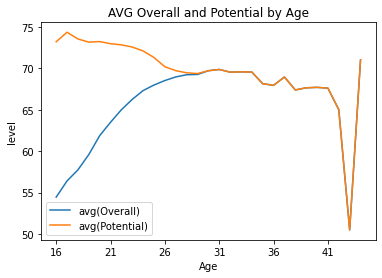

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#passing dataset required to Pandas 
df_plot = df.groupby(["Age"])\
.agg({"Overall": "AVG", "Potential": "AVG"})\
.orderBy("Age", descending=False)\
.toPandas()
print(df_plot) #print to check age when fully released potential

#plot
df_plot.plot(x="Age")
plt.title("AVG Overall and Potential by Age")
plt.ylabel("level")
plt.xlabel("Age")
plt.legend(loc='best')

## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for exploring the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and use the position attribute, ID attribute (for later processing) and skill-set attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



In [0]:
#filter features
df_filtered = df.filter(df.Position != "GK")\
.select("ID", "Position",'Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle')
df_filtered.show()

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+------

To make the later stage easier, we define the position group by using the position feature (attributes on Position).
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [0]:
from pyspark.sql.functions import when,col

#create column "Position_Group" by condition
df_kmeans = df_filtered.withColumn("Position_Group", 
                                        when(col("Position") == "LB" , "DEF")\
                                       .when(col("Position") == "LWB", "DEF")\
                                       .when(col("Position") == "RB" , "DEF")\
                                       .when(col("Position") == "LCB", "DEF")\
                                       .when(col("Position") == "RCB", "DEF")\
                                       .when(col("Position") == "CB" , "DEF")\
                                       .when(col("Position") == "RWB", "DEF")\
                                       .when(col("Position") == "RF", "FWD")\
                                       .when(col("Position") == "LF" , "FWD")\
                                       .when(col("Position") == "LW", "FWD")\
                                       .when(col("Position") == "RS", "FWD")\
                                       .when(col("Position") == "RW" , "FWD")\
                                       .when(col("Position") == "LS", "FWD")\
                                       .when(col("Position") == "CF" , "FWD")\
                                       .when(col("Position") == "ST", "FWD")\
                                       .otherwise("MID"))
df_kmeans.show()                                                              

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+---

In [0]:
#change datatype for further requirements
from pyspark.sql.types import DoubleType
df_kmeans_new = df_kmeans.withColumn("Height(CM)",col("Height(CM)").cast(DoubleType()))\
    .withColumn("Weight(KG)",col("Weight(KG)").cast(DoubleType()))\
    .withColumn("Crossing",col("Crossing").cast(DoubleType()))\
    .withColumn("Finishing",col("Finishing").cast(DoubleType()))\
    .withColumn("HeadingAccuracy",col("HeadingAccuracy").cast(DoubleType()))\
    .withColumn("ShortPassing",col("ShortPassing").cast(DoubleType()))\
    .withColumn("Volleys",col("Volleys").cast(DoubleType()))\
    .withColumn("Dribbling",col("Dribbling").cast(DoubleType()))\
    .withColumn("Curve",col("Curve").cast(DoubleType()))\
    .withColumn("FKAccuracy",col("FKAccuracy").cast(DoubleType()))\
    .withColumn("LongPassing",col("LongPassing").cast(DoubleType()))\
    .withColumn("BallControl",col("BallControl").cast(DoubleType()))\
    .withColumn("Acceleration",col("Acceleration").cast(DoubleType()))\
    .withColumn("SprintSpeed",col("SprintSpeed").cast(DoubleType()))\
    .withColumn("Agility",col("Agility").cast(DoubleType()))\
    .withColumn("Reactions",col("Reactions").cast(DoubleType()))\
    .withColumn("Balance",col("Balance").cast(DoubleType()))\
    .withColumn("ShotPower",col("ShotPower").cast(DoubleType()))\
    .withColumn("Jumping",col("Jumping").cast(DoubleType()))\
    .withColumn("Stamina",col("Stamina").cast(DoubleType()))\
    .withColumn("Strength",col("Strength").cast(DoubleType()))\
    .withColumn("LongShots",col("LongShots").cast(DoubleType()))\
    .withColumn("Aggression",col("Aggression").cast(DoubleType()))\
    .withColumn("Interceptions",col("Interceptions").cast(DoubleType()))\
    .withColumn("Positioning",col("Positioning").cast(DoubleType()))\
    .withColumn("Vision",col("Vision").cast(DoubleType()))\
    .withColumn("Penalties",col("Penalties").cast(DoubleType()))\
    .withColumn("Composure",col("Composure").cast(DoubleType()))\
    .withColumn("Marking",col("Marking").cast(DoubleType()))\
    .withColumn("StandingTackle",col("StandingTackle").cast(DoubleType()))\
    .withColumn("SlidingTackle",col("SlidingTackle").cast(DoubleType()))\

df_kmeans_new

DataFrame[ID: string, Position: string, Height(CM): double, Weight(KG): double, Crossing: double, Finishing: double, HeadingAccuracy: double, ShortPassing: double, Volleys: double, Dribbling: double, Curve: double, FKAccuracy: double, LongPassing: double, BallControl: double, Acceleration: double, SprintSpeed: double, Agility: double, Reactions: double, Balance: double, ShotPower: double, Jumping: double, Stamina: double, Strength: double, LongShots: double, Aggression: double, Interceptions: double, Positioning: double, Vision: double, Penalties: double, Composure: double, Marking: double, StandingTackle: double, SlidingTackle: double, Position_Group: string]

Now, we remove the Position_Group and Position to create the feature for Kmeans




In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
#create and transform vector for kmeans 
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



In [0]:
#calculate cost equation for each 'k' means
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans_)
    cost[k] = model.computeCost(df_kmeans_) 

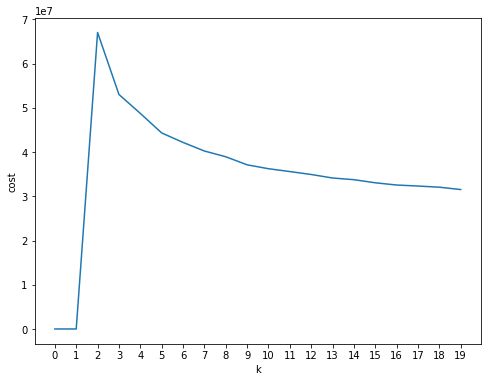

In [0]:
#plot costs
x = np.arange(20)
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.set_xlabel('k')
ax.set_ylabel('cost')
plt.xticks(x)
plt.plot(cost)


### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on each Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there relationship between Position_Group and a particular Cluster?</li>
    </ol>

</div>
</div>




In [0]:
#create kmeans k=8
from pyspark.ml.clustering import KMeans, KMeansModel
k = 8
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans_)
df_kmeans_pred = model.transform(df_kmeans_)
df_kmeans_pred.show(10)

+------+--------------------+----------+
|    ID|            features|prediction|
+------+--------------------+----------+
|158023|[173.736,72.12112...|         2|
| 20801|[188.976,83.00733...|         2|
|190871|[179.832,68.0388,...|         2|
|192985|[155.7528,69.8531...|         4|
|183277|[176.784,73.93549...|         2|
|177003|[176.784,66.22443...|         4|
|176580|[182.88,86.18248,...|         2|
|155862|[182.88,82.100152...|         4|
|188545|[182.88,79.832192...|         2|
|182521|[182.88,76.203456...|         4|
+------+--------------------+----------+
only showing top 10 rows



In [0]:
#calculate centroids
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[177.3317464   76.31794486  58.41639945  44.02061383  62.79111315
  67.3220339   42.5387082   61.02611086  52.17911131  46.79294549
  63.5510765   65.5758131   65.25240495  66.06596427  64.62757673
  66.20568026  64.10581768  62.28263857  70.52038479  73.82638571
  72.67384333  52.59688502  71.43426477  67.65048099  53.27072836
  57.47457627  48.97938617  64.57627119  66.67155291  68.96472744
  66.88914338]
[187.68026262  81.70680941  39.8684377   30.21252372  68.72675522
  59.71600253  31.19354839  44.54332701  34.72485769  33.42631246
  54.99114485  55.46110057  53.19481341  55.6059456   50.15876028
  62.97975965  50.6116382   51.14231499  68.34977862  64.29095509
  79.52941176  34.24351676  70.56799494  67.06388362  33.600253
  41.73561037  41.05566097  61.12903226  67.29411765  69.6116382
  66.76533839]
[172.46617578  73.21508518  65.18944637  68.70069204  57.79541522
  69.00043253  64.56055363  73.22923875  67.01859862  61.3399654
  60.86245675  72.86548443  76.2

In [0]:
#count prediction cases 
df_kmeans_pred.groupBy("prediction")\
              .count()\
              .orderBy("prediction", descending=False)\
              .show()

+----------+-----+
|prediction|count|
+----------+-----+
|         0| 2208|
|         1| 1581|
|         2| 2311|
|         3| 1344|
|         4| 2390|
|         5| 2029|
|         6| 1783|
|         7| 2476|
+----------+-----+



In [0]:
#join requirement
spark.conf.set("spark.sql.crossJoin.enabled", "true")

In [0]:
#create dataframe for classification (next task)
df_kmeans_pred = df_kmeans_pred.drop("features")
df_kmeans_pred_ = df_kmeans_new.join(df_kmeans_pred, df_kmeans_new.ID ==  df_kmeans_pred.ID)

In [0]:
#check prediction cases per Position_Group
df_kmeans_pred_.groupBy("prediction", "Position_Group")\
               .count().orderBy("prediction", descending=False)\
               .show()

+----------+--------------+-----+
|prediction|Position_Group|count|
+----------+--------------+-----+
|         0|           FWD|   11|
|         0|           MID|  967|
|         0|           DEF| 1230|
|         1|           FWD|    2|
|         1|           MID|  117|
|         1|           DEF| 1462|
|         2|           DEF|    4|
|         2|           FWD| 1112|
|         2|           MID| 1195|
|         3|           MID|   77|
|         3|           FWD|    1|
|         3|           DEF| 1266|
|         4|           DEF|  599|
|         4|           MID| 1720|
|         4|           FWD|   71|
|         5|           DEF|    8|
|         5|           MID| 1486|
|         5|           FWD|  535|
|         6|           FWD| 1648|
|         6|           MID|  135|
+----------+--------------+-----+
only showing top 20 rows



In [0]:
df_kmeans_pred_.show()

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+------+----------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|    ID|prediction|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----

## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skill set values to segment the players into 8 clusters. Now we want to see whether we could accurately predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and only use the skill set features and the cluster results from Kmeans as the input (you need to create a column for your cluster results and name it as Cluster) for the model. Your target for classification is "Position_Group".

In [0]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','prediction']

#create and transform vector for classification
vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')
df_class_.show(3)

+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.736,72.12112...|           FWD|
|[188.976,83.00733...|           FWD|
|[179.832,68.0388,...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In many data science modelling work, feature scaling is very important.
In here, we use standard scaling on the features.

In [0]:
from pyspark.ml.feature import StandardScaler
#standarization
standardscaler = StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data = standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.736,72.12112...|[12.9261363965246...|           FWD|
|[188.976,83.00733...|[14.0600080102548...|           FWD|
|[179.832,68.0388,...|[13.3796850420167...|           FWD|
|[155.7528,69.8531...|[11.5881678923229...|           MID|
|[176.784,73.93549...|[13.1529107192706...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [0]:
#change "Position_Group" by coding 0,1,2
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

### 3.2 Training Test Evaluation

We remove the feature of position and use all other skill set features and the cluster results as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [0]:
#separate train/test dataset 
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [0]:
#create and fit a logistic regression classifier
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model1 = lr.fit(train)

predict_train1 = model1.transform(train)
predict_test1 = model1.transform(test)
predict_test1.select("Target","prediction").show(10)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     1|       2.0|
|     0|       0.0|
|     2|       2.0|
+------+----------+
only showing top 10 rows




****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




In [0]:
#calculate confusion matrix
from sklearn.metrics import confusion_matrix
y_true = predict_test1.select("Target").collect()
y_pred = predict_test1.select("prediction").collect()
confusion_matrix(y_true, y_pred)

array([[ 834,    5,  178],
       [   2, 1422,  293],
       [ 225,  238, 1619]])

In [0]:
#calculate report including precision, recall, F1-score
from sklearn.metrics import classification_report
import csv
target_names = ["FWD", "DEF", "MID"]
classification_report(y_true, y_pred, target_names=target_names)

'              precision    recall  f1-score   support\n\n         FWD       0.79      0.82      0.80      1017\n         DEF       0.85      0.83      0.84      1717\n         MID       0.77      0.78      0.78      2082\n\n    accuracy                           0.80      4816\n   macro avg       0.80      0.81      0.81      4816\nweighted avg       0.81      0.80      0.80      4816\n'

### 3.3 K-fold Cross-Validation

We surely missed something during the modelling work -- Hyper-parameter tuning! We can use K-fold cross validation to find out the best hyper-parameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyper-parameters based on this cross-validation results</li>
        <li> Any difficulties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



In [0]:
#packages required for cross-validation
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [0]:
#create and fit a Random Forest classifier
rf = RandomForestClassifier(labelCol="Target", featuresCol="Scaled_features")
model2 = rf.fit(train)

predict_train2 = model2.transform(train)
predict_test2 = model2.transform(test)
predict_test2.select("Target","prediction").show(10)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     1|       1.0|
|     0|       0.0|
|     2|       2.0|
+------+----------+
only showing top 10 rows



In [0]:
#create and fit a decision tree classifier
dt = DecisionTreeClassifier(labelCol="Target", featuresCol="Scaled_features")
model3 = dt.fit(train)

predict_train3 = model3.transform(train)
predict_test3 = model3.transform(test)
predict_test3.select("Target","prediction").show(10)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       0.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     1|       1.0|
|     0|       0.0|
|     2|       2.0|
+------+----------+
only showing top 10 rows



In [0]:
#k fold cross-validation for logistic regression classifier
training = predict_test1.select("Target", "Scaled_features")
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="f1")
pipeline = Pipeline(stages=[lr])
paramGrid = ParamGridBuilder()\
            .addGrid(lr.regParam, [0.1, 0.01])\
            .build() 

crossval = CrossValidator(estimator=pipeline,\
                          estimatorParamMaps=paramGrid,\
                          evaluator=evaluator,\
                          numFolds=2)
#run cross-validation and choose the best set of parameters
model = crossval.fit(training)
print(model.avgMetrics)
predictions = model.transform(test)
print(evaluator.evaluate(predictions))
model.bestModel.stages[-1].extractParamMap()

[0.7993140139825083, 0.798706601172136]
0.8007798385821261


{Param(parent='LogisticRegression_5a80b2bb4a75', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2)'): 2,
 Param(parent='LogisticRegression_5a80b2bb4a75', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty'): 0.0,
 Param(parent='LogisticRegression_5a80b2bb4a75', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial.'): 'auto',
 Param(parent='LogisticRegression_5a80b2bb4a75', name='featuresCol', doc='features column name'): 'Scaled_features',
 Param(parent='LogisticRegression_5a80b2bb4a75', name='fitIntercept', doc='whether to fit an intercept term'): True,
 Param(parent='LogisticRegression_5a80b2bb4a75', name='labelCol', doc='label column name'): 'Target',
 Param(parent='LogisticRegression_5a80b2bb4a75', name='maxIter', doc='maximum number of iterations (>

In [0]:
#k fold cross-validation for random forest classifier
training = predict_test2.select("Target", "Scaled_features")
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="f1")
pipeline = Pipeline(stages=[rf])
paramGrid = ParamGridBuilder()\
            .addGrid(rf.numTrees, [1,10])\
            .build() 

crossval = CrossValidator(estimator=pipeline,\
                          estimatorParamMaps=paramGrid,\
                          evaluator=evaluator,\
                          numFolds=2)
#run cross-validation and choose the best set of parameters
model = crossval.fit(training)
print(model.avgMetrics)
predictions = model.transform(test)
print(evaluator.evaluate(predictions))
model.bestModel.stages[-1].extractParamMap()

[0.7955835974391585, 0.8131425087855292]
0.8289432967580806


{Param(parent='RandomForestClassifier_86b9adcb1560', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees.'): False,
 Param(parent='RandomForestClassifier_86b9adcb1560', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext'): 10,
 Param(parent='RandomForestClassifier_86b9adcb1560', name='featureSubsetStrategy', doc='The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n].'): 'auto',
 Param(parent='RandomForestClassifier_86b9adcb1560', name='featuresCol', doc='features column name'): 'Scaled_features',
 Param(parent='RandomForestClassifier_86b9adcb

In [0]:
#k fold cross-validation for decision tree classifier
training = predict_test3.select("Target", "Scaled_features")
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="f1")
pipeline = Pipeline(stages=[dt])
paramGrid = ParamGridBuilder()\
            .addGrid(dt.maxDepth, [2, 10])\
            .build() 

crossval = CrossValidator(estimator=pipeline,\
                          estimatorParamMaps=paramGrid,\
                          evaluator=evaluator,\
                          numFolds=2)
#run cross-validation and choose the best set of parameters
model = crossval.fit(training)
print(model.avgMetrics)
predictions = model.transform(test)
print(evaluator.evaluate(predictions))
model.bestModel.stages[-1].extractParamMap()

[0.7174797255555181, 0.7757307913580018]
0.9417483506533753


{Param(parent='DecisionTreeClassifier_df0d23255a13', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees.'): False,
 Param(parent='DecisionTreeClassifier_df0d23255a13', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext'): 10,
 Param(parent='DecisionTreeClassifier_df0d23255a13', name='featuresCol', doc='features column name'): 'Scaled_features',
 Param(parent='DecisionTreeClassifier_df0d23255a13', name='impurity', doc='Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini'): 'gini',
 Param(parent='DecisionTreeClassifier_df0d23255a13', name='labelCol', doc='label column name'

In [0]:
#performance measurement
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='Target')
print("Test Area Under ROC Model 1: " + str(evaluator.evaluate(predict_test1, {evaluator.metricName: "areaUnderROC"})))
evaluator = BinaryClassificationEvaluator(labelCol='Target')
print("Test Area Under ROC Model 2: " + str(evaluator.evaluate(predict_test2, {evaluator.metricName: "areaUnderROC"})))
evaluator = BinaryClassificationEvaluator(labelCol='Target')
print("Test Area Under ROC Model 3: " + str(evaluator.evaluate(predict_test3, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC Model 1: 0.8796754204581618
Test Area Under ROC Model 2: 0.9473330843416575
Test Area Under ROC Model 3: 0.9011675173019449


Text(0.5, 0, 'Feature')

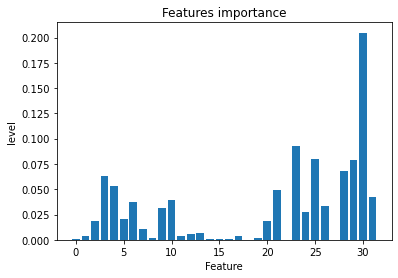

In [0]:
#get importantce features from best model and plot 
importance_list = pd.Series(model2.featureImportances.values)
index = np.arange(len(importance_list))
plt.bar(index, importance_list)
plt.title("Features importance")
plt.ylabel("level")
plt.xlabel("Feature")

In [0]:
#important features > 0.050
sorted_imp = importance_list.sort_values(ascending= False)
index_imp_features = list((sorted_imp[sorted_imp > 0.050]).index)
index_imp_features

[30, 23, 25, 29, 28, 3, 4]

In [0]:
#define rising star using most important features and age <= 25
df_rising_star = df.withColumn("Rising_star", df[24+30]+df[24+23]+df[24+25]+df[24+29]+df[24+28]+df[24+3]+df[24+4])
df_rising_star.where((col("Age") <= 25)).orderBy("Rising_star", ascending=False).select("Name", "Age", "Rising_star").show(5)

+--------------+---+-----------+
|          Name|Age|Rising_star|
+--------------+---+-----------+
|     R. Lukaku| 25| 706.893544|
|J. Vestergaard| 25| 703.975872|
|       H. Kane| 24| 703.904032|
|     S. Haller| 24| 691.171992|
|      P. Pogba| 25|  690.91452|
+--------------+---+-----------+
only showing top 5 rows

